In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to (or create) SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
data = [
    ("Laptop", 10, 50000),
    ("Mobile", 25, 15000),
    ("Tablet", 15, 20000),
    ("Headphones", 30, 2000),
    ("Smartwatch", 20, 5000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()
print("✅ Sample data inserted successfully!")


✅ Sample data inserted successfully!


In [3]:
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print("📊 Sales Summary:\n")
print(df)


📊 Sales Summary:

      product  total_qty   revenue
0  Headphones         30   60000.0
1      Laptop         10  500000.0
2      Mobile         25  375000.0
3  Smartwatch         20  100000.0
4      Tablet         15  300000.0


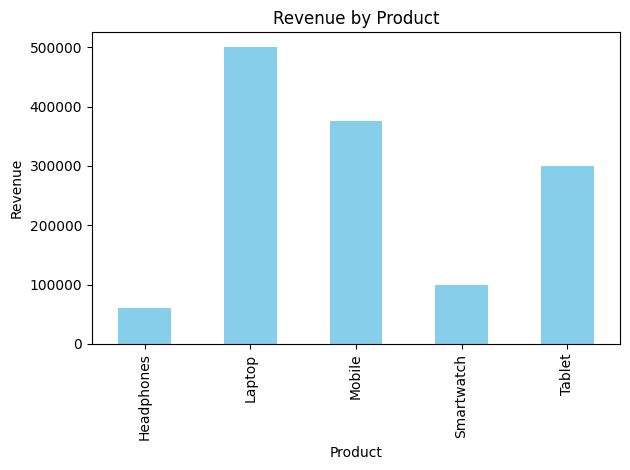

In [4]:
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [5]:
plt.savefig("sales_chart.png")



<Figure size 640x480 with 0 Axes>

In [6]:
conn.close()
